>### Name : Weerasinghe K.N. <br>Index No : 190672T

In [23]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
from math import sqrt
import scipy

(-1.5155440021655617, 0.7453512106162419, 8.821546537320353)
(-0.964445995251935, 0.9941298148563131, 9.38904543034548)
(-0.7695895541722941, 1.0820926801182449, 9.590787750786452)
(0.04882692276536259, -0.3216027763396086, 9.355428084675472)
(-0.10348152647006964, -0.21772332299885722, 9.287847137348544)
(-0.09534964511510247, 0.45250558255583073, 9.691755306817766)
(0.12891169327730012, 0.24309637941738535, 9.744479398691002)
(0.08003966482262147, 0.28873176864272737, 9.732189583638803)
(-0.3420237460728712, 0.27273360730860774, 9.979336934225353)
(-0.3228823361163504, 0.28192394391104175, 9.960902340219524)
53


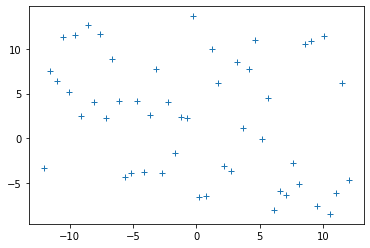

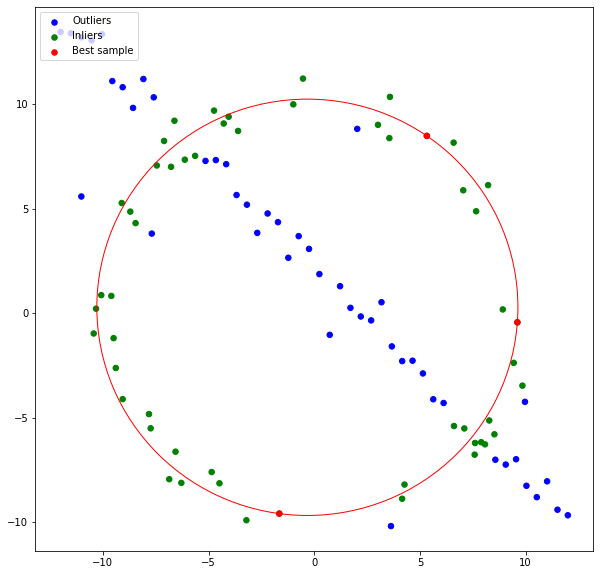

In [24]:
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r/16
t = np.random.uniform(0,2*np.pi,half_n)
n = s*np.random.randn (half_n)
x,y = (r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m, b =-1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np.round(np.vstack((X_circ,X_line)),4)

def get_circle(x1,y1, x2,y2, x3,y3):
    x1y1 =x1**2 +y1**2
    x2y2 =x2**2 +y2**2
    x3y3 =x3**2 +y3**2

    mat = np.array([[x1y1, x1, y1, 1],[x2y2, x2, y2, 1],[x3y3, x3, y3, 1]])
    det_1 = np.round(np.linalg.det(np.hstack((mat[:,1].reshape(3,1),mat[:,2].reshape(3,1),mat[:,3].reshape(3,1)))) ,5)
    det_2 =  np.round(-np.linalg.det(np.hstack((mat[:,0].reshape(3,1),mat[:,2].reshape(3,1),mat[:,3].reshape(3,1)))) ,5)
    det_3 =  np.round(np.linalg.det(np.hstack((mat[:,0].reshape(3,1),mat[:,1].reshape(3,1),mat[:,3].reshape(3,1)))) ,5)
    det_4 =  np.round(-np.linalg.det(np.hstack((mat[:,0].reshape(3,1),mat[:,1].reshape(3,1),mat[:,2].reshape(3,1)))) ,5)

    x_c = (det_2/det_1)/(-2)
    y_c = (det_3/det_1)/(-2)
    r = np.sqrt(x_c**2 + y_c**2 - (det_4/det_1))

    return (x_c, y_c, r)

def RANSAC_circ(X,thrsh):
    inliners_max=[]
    def T_check(x,c):
        return np.sqrt((x[0]-c[0])**2+(x[1]-c[1])**2)-c[2]
    for i in range(len(X)-2):
        for j in range(i+1,len(X)-1):
            for k in range(j+1,len(X)):
                inliners=[]
                C=get_circle(X[i][0],X[i][1],X[j][0],X[j][1],X[k][0],X[k][1])
                if C==0:
                    continue
                else:
                    for x in X:
                        if abs(T_check(x,C))<thrsh:
                            inliners.append(list(x))
                    if len(inliners)>len(inliners_max):
                        print(C)
                        Output,inliners_max,Output_2=C,inliners.copy(),[X[i],X[j],X[k]]
    return Output,Output_2,inliners_max

threshold=1
RANSAC,BEST_sample,inliners=RANSAC_circ(X,threshold)
outliners=[]
for i in range(N):
    if (list(X[i]) not in inliners):
        outliners.append(list(X[i]))
print(len(inliners))
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(np.array(outliners)[:,0],np.array(outliners)[:,1],s= np.ones(len(outliners))*30 , color= 'blue', label = 'Outliers')
plt.scatter(np.array(inliners)[:,0],np.array(inliners)[:,1],s= np.ones(len(inliners))*30, color= 'green', label = 'Inliers')
plt.scatter(np.array(BEST_sample)[:,0],np.array(BEST_sample)[:,1],s= np.ones(len(BEST_sample))*30 , color= 'red', label = 'Best sample')
RANSAC=plt.Circle((RANSAC[0],RANSAC[1]),RANSAC[2],color="r",fill=False)
ax.add_artist(RANSAC)
plt.legend(loc="upper left")
plt.show()
                    
                    





In [1]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
from math import sqrt
import scipy

In [36]:
import cv2
Cordinates=[]
def click_event(event, x, y, flags, params):
    global Cordinates
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        Cordinates.append([x,y])
 
# driver function
if __name__=="__main__":
    wall = cv2.imread("Images/uom1.jpg")
    logo = cv2.imread("Images/entc1.png")
    cv2.imshow('image', wall)

    print("Click on 4 points with the edges of the morph and close the window")
    cv2.setMouseCallback('image', click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    size = logo.shape
    logo_corners = np.array([[0,0],[size[1] - 1, 0],[size[1] - 1, size[0] -1],[0, size[0] - 1 ]],dtype=float)
    homography_C=np.array([Cordinates[0],Cordinates[1],Cordinates[2],Cordinates[3]],dtype=float)
    h, status = cv2.findHomography(np.array(logo_corners),np.array(homography_C))
    warped = cv2.warpPerspective(logo, h, (wall.shape[1],wall.shape[0]))
    #cv2.fillConvexPoly(wall, homography_C.astype(int), 0, 16)
    alpha = 0.5   #------------------>variable
    beta = (1.0 - alpha)
    wall = cv2.addWeighted(wall, alpha, warped, beta, 0)
    cv2.imshow('image', wall)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

print(Cordinates)

Click on 4 points with the edges of the morph and close the window
[[260, 172], [452, 133], [458, 190], [255, 213]]
